In [1]:
from ase.io.trajectory import TrajectoryWriter as tw
from ase.io.trajectory import TrajectoryReader as tr

import os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import InsetPosition
import seaborn as sns

from publish_format import useLargeSize

/gpfs/data/brubenst/chuang25/pythonvirtualenv/ml/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### optimization structure

In [2]:
optimized_structure = tr("./dft/c2_opt.traj")

In [3]:
def printenergy(traj, name):
    print(name)
    for atoms in traj:
        print(atoms.get_distances(0,1)[0], 
              atoms.get_total_energy(), 
              atoms.get_potential_energy(), 
              atoms.get_kinetic_energy(),)

In [4]:
printenergy(optimized_structure, "DFT")

DFT
1.2419995067034506 -299.27780402288204 -299.27780402288204 0.0
1.2634109536552893 -299.289356796498 -299.289356796498 0.0
1.2616898279941646 -299.2894442442655 -299.2894442442655 0.0


In [5]:
optimized_energy = optimized_structure[-1].get_potential_energy()

## NVE molecular dynamics

In [26]:
file_dft = "./dft/md_nve_dft.traj"
file_amptorch_dft_force = "./amptorch_dft_force/md_nve_amptorch.traj"
file_amptorch_dft_noforce = "./amptorch_dft_noforce/md_nve_amptorch.traj"
file_amptorch_dmc = "./amptorch_dmc/md_nve_amptorch.traj"

traj_dft = tr(file_dft)
traj_amptorch_dft_force = tr(file_amptorch_dft_force)
traj_amptorch_dft_noforce = tr(file_amptorch_dft_noforce)
traj_amptorch_dmc = tr(file_amptorch_dmc)

In [27]:
print(len(traj_dft), 
      len(traj_amptorch_dft_force), 
      len(traj_amptorch_dft_noforce),
      len(traj_amptorch_dmc),
     )

153 2001 2001 2001


### $E_{total}$ v.s. Time

In [7]:
time = [] 
data = [] # DFT, AMPtorch-DFT (with force), AMPtorch-DFT (without force), AMPtorch-DMC
optimized_energy = 0

time.append(np.arange(len(traj_dft)))
d = np.array([traj.get_total_energy() for traj in traj_dft])
optimized_energy = np.mean(d)
# data.append(d-optimized_energy)
data.append(d - np.mean(d))

time.append(np.arange(len(traj_amptorch_dft_force)))
d = np.array([traj.get_total_energy() for traj in traj_amptorch_dft_force])
# data.append(d-optimized_energy)
data.append(d - np.mean(d))

time.append(np.arange(len(traj_amptorch_dft_noforce)))
d = np.array([traj.get_total_energy() for traj in traj_amptorch_dft_noforce])
# data.append(d-optimized_energy)
data.append(d - np.mean(d))

time.append(np.arange(len(traj_amptorch_dmc)))
d = np.array([traj.get_total_energy() for traj in traj_amptorch_dmc])
# data.append(d-optimized_energy)
data.append(d - np.mean(d))

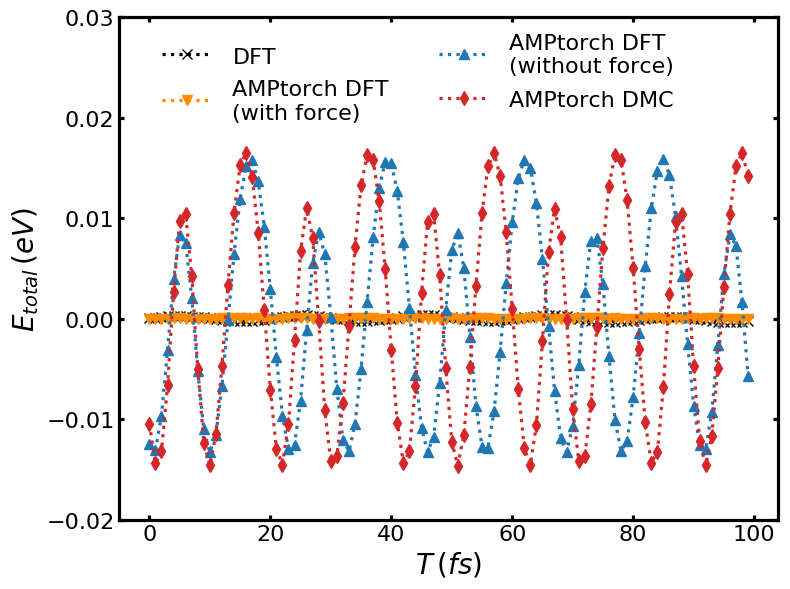

In [8]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

start, end = 0, 100
ax.plot(time[0][start:end], data[0][start:end], marker="x", linestyle="dotted", markersize=7, c="k", label="DFT")
ax.plot(time[1][start:end], data[1][start:end], marker="v", markersize=7, linestyle="dotted", c="darkorange", label="AMPtorch DFT\n(with force)")
ax.plot(time[2][start:end], data[2][start:end], marker="^", markersize=7, linestyle="dotted", c="tab:blue", label="AMPtorch DFT\n(without force)")
ax.plot(time[3][start:end], data[3][start:end], marker="d", markersize=7, linestyle="dotted", c="tab:red", label="AMPtorch DMC")
ax.set_xlabel(r"$T\,(fs)$")
ax.set_ylabel(r"$E_{total}\,(eV$)")
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(loc=(0.05, 0.77), frameon=False, fontsize=18, ncol=2)
ax.set_ylim(-0.02, 0.03)

useLargeSize(plt, ax)
plt.savefig("./check_c2_nve_etot.png", dpi=300)

### $E_{pot}$ v.s. Time

In [3]:
time = [] 
data = [] # DFT, AMPtorch-DFT (with force), AMPtorch-DFT (without force), AMPtorch-DMC
optimized_energy = 0

time.append(np.arange(len(traj_dft)))
d = np.array([traj.get_potential_energy() for traj in traj_dft])
optimized_energy = np.mean(d)
# data.append(d - optimized_energy)
# data.append(d - np.mean(d))
data.append(d - np.min(d))

time.append(np.arange(len(traj_amptorch_dft_force)))
d = np.array([traj.get_potential_energy() for traj in traj_amptorch_dft_force])
# data.append(d - optimized_energy)
# data.append(d - np.mean(d))
data.append(d - np.min(d))

time.append(np.arange(len(traj_amptorch_dft_noforce)))
d = np.array([traj.get_potential_energy() for traj in traj_amptorch_dft_noforce])
# data.append(d - optimized_energy)
# data.append(d - np.mean(d))
data.append(d - np.min(d))

time.append(np.arange(len(traj_amptorch_dmc)))
d = np.array([traj.get_potential_energy() for traj in traj_amptorch_dmc])
# data.append(d - optimized_energy)
# data.append(d - np.mean(d))
data.append(d - np.min(d))

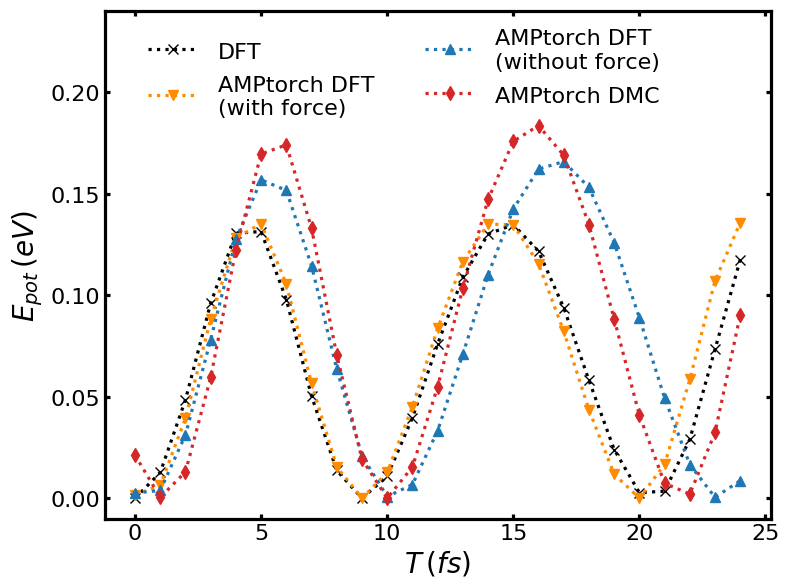

In [6]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

start, end = 0, 25
ax.plot(time[0][start:end], data[0][start:end], marker="x", linestyle="dotted", markersize=7, c="k", label="DFT")
ax.plot(time[1][start:end], data[1][start:end], marker="v", markersize=7, linestyle="dotted", c="darkorange", label="AMPtorch DFT\n(with force)")
ax.plot(time[2][start:end], data[2][start:end], marker="^", markersize=7, linestyle="dotted", c="tab:blue", label="AMPtorch DFT\n(without force)")
ax.plot(time[3][start:end], data[3][start:end], marker="d", markersize=7, linestyle="dotted", c="tab:red", label="AMPtorch DMC")
ax.set_xlabel(r"$T\,(fs)$")
ax.set_ylabel(r"$E_{pot}\,(eV$)")
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(loc=(0.05, 0.77), frameon=False, fontsize=18, ncol=2)
ax.set_ylim(-0.01, 0.24)

useLargeSize(plt, ax)
plt.savefig("./check_c2_nve_epot.png", dpi=300)

### $E_{kin}$ v.s. Time

In [9]:
time = [] 
data = [] # DFT, AMPtorch-DFT (with force), AMPtorch-DFT (without force), AMPtorch-DMC

time.append(np.arange(len(traj_dft)))
data.append(np.array([traj.get_kinetic_energy() for traj in traj_dft]))

time.append(np.arange(len(traj_amptorch_dft_force)))
data.append(np.array([traj.get_kinetic_energy() for traj in traj_amptorch_dft_force]))

time.append(np.arange(len(traj_amptorch_dft_noforce)))
data.append(np.array([traj.get_kinetic_energy() for traj in traj_amptorch_dft_noforce]))

time.append(np.arange(len(traj_amptorch_dmc)))
data.append(np.array([traj.get_kinetic_energy() for traj in traj_amptorch_dmc]))

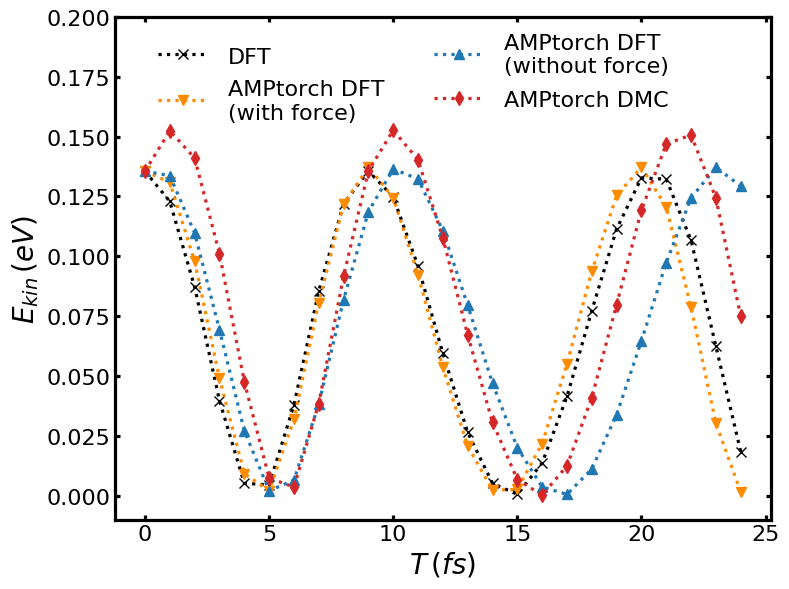

In [12]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

start, end = 0, 25
ax.plot(time[0][start:end], data[0][start:end], marker="x", linestyle="dotted", markersize=7, c="k", label="DFT")
ax.plot(time[1][start:end], data[1][start:end], marker="v", markersize=7, linestyle="dotted", c="darkorange", label="AMPtorch DFT\n(with force)")
ax.plot(time[2][start:end], data[2][start:end], marker="^", markersize=7, linestyle="dotted", c="tab:blue", label="AMPtorch DFT\n(without force)")
ax.plot(time[3][start:end], data[3][start:end], marker="d", markersize=7, linestyle="dotted", c="tab:red", label="AMPtorch DMC")
ax.set_xlabel(r"$T\,(fs)$")
ax.set_ylabel(r"$E_{kin}\,(eV$)")
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(loc=(0.05, 0.77), frameon=False, fontsize=18, ncol=2)
ax.set_ylim(-0.01, 0.2)

useLargeSize(plt, ax)
plt.savefig("./check_c2_nve_ekin.png", dpi=300)

### $d_{C-C}$ v.s. Time

In [13]:
time = [] 
data = [] # DFT, AMPtorch-DFT (with force), AMPtorch-DFT (without force), AMPtorch-DMC

time.append(np.arange(len(traj_dft)))
data.append(np.array([traj.get_distances(0,1)[0] for traj in traj_dft]))

time.append(np.arange(len(traj_amptorch_dft_force)))
data.append(np.array([traj.get_distances(0,1)[0] for traj in traj_amptorch_dft_force]))

time.append(np.arange(len(traj_amptorch_dft_noforce)))
data.append(np.array([traj.get_distances(0,1)[0] for traj in traj_amptorch_dft_noforce]))

time.append(np.arange(len(traj_amptorch_dmc)))
data.append(np.array([traj.get_distances(0,1)[0] for traj in traj_amptorch_dmc]))

In [25]:
for item in data:
    print(np.mean(item))

1.2707924862382254
1.2632268747388733
1.2645926690930034
1.2479201349842024


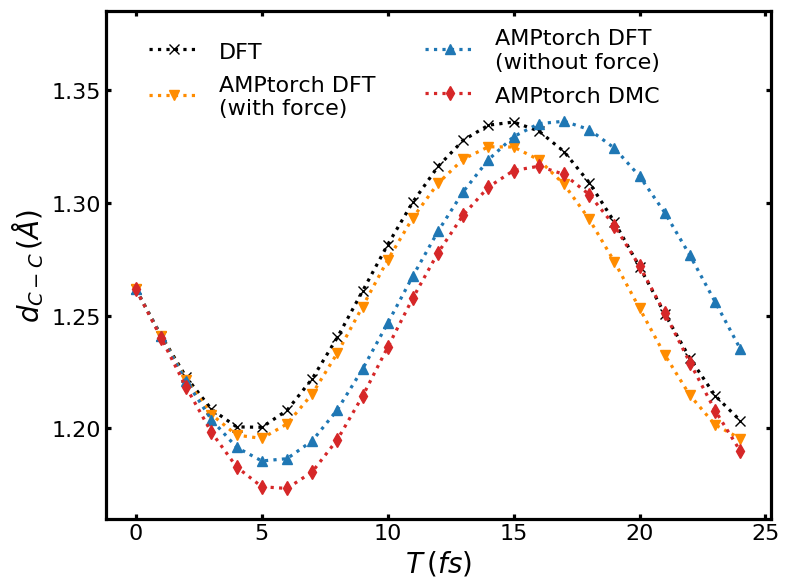

In [24]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

start, end = 0, 25
ax.plot(time[0][start:end], data[0][start:end], marker="x", linestyle="dotted", markersize=7, c="k", label="DFT")
ax.plot(time[1][start:end], data[1][start:end], marker="v", markersize=7, linestyle="dotted", c="darkorange", label="AMPtorch DFT\n(with force)")
ax.plot(time[2][start:end], data[2][start:end], marker="^", markersize=7, linestyle="dotted", c="tab:blue", label="AMPtorch DFT\n(without force)")
ax.plot(time[3][start:end], data[3][start:end], marker="d", markersize=7, linestyle="dotted", c="tab:red", label="AMPtorch DMC")
ax.set_xlabel(r"$T\,(fs)$")
ax.set_ylabel(r"$d_{C-C}\,({\AA})$")
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(loc=(0.05, 0.77), frameon=False, fontsize=18, ncol=2)
ax.set_ylim(1.16, 1.385)

useLargeSize(plt, ax)
plt.savefig("./check_c2_nve_r.png", dpi=300)